# Chapter 3: Sampling the Imaginary - Exercises

In [75]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import arviz as az

In [2]:
np.random.seed(42)

p_grid = np.linspace(0, 1, 1000)
prior = np.repeat(1, 1000)
likelihood = stats.binom.pmf(k=6, n=9, p=p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()

samples = np.random.choice(p_grid, p=posterior, size=1000, replace=True)

Use the values in `samples` to answer the questions that follow.

**3E1** How much posterior probability lies below $p=0.2$?

In [12]:
sum(samples < 0.2) / 1000

0.0

**3E2** How much posterior probability lies above $p=0.8$?

In [13]:
sum(samples > 0.8) / 1000

0.124

**3E3** How much posterior probability lies between $p=0.2$ and $p=0.8$?

In [14]:
sum((samples > 0.2) & (samples < 0.8)) / 1000 

0.876

**3E4** 20% of the posterior probability lies below which value of $p$?

In [15]:
np.quantile(samples, 0.2)

0.5035035035035035

**3E5** 20% of the posterior probability lies above which value of $p$?

In [16]:
np.quantile(samples, (1 - 0.2))

0.7607607607607607

**3E6** Which values of $p$ contain the narrowest interval equal to 66% of the posterior probability?

In [18]:
az.hdi(samples, 0.66)

array([0.53553554, 0.81781782])

**3E7** Which values of $p$ contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

In [19]:
np.quantile(samples, [0.5 - 0.66/2, 0.5 + 0.66/2])

array([0.48748749, 0.77111111])

**3M1** Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

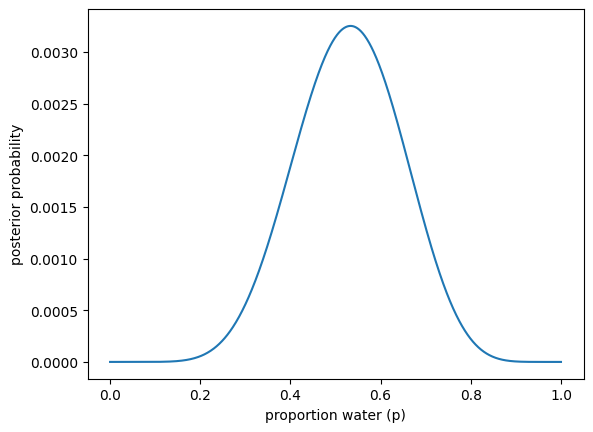

In [23]:
GRID_SIZE = 1000

p_grid = np.linspace(0, 1, GRID_SIZE)
prior = np.repeat(1, 1000)
likelihood = stats.binom.pmf(k=8, n=15, p=p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()

plt.plot(p_grid, posterior)
plt.xlabel('proportion water (p)')
plt.ylabel('posterior probability');

**3M2** Draw 10000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for p.

In [24]:
samples = np.random.choice(p_grid, p=posterior, size=10_000, replace=True)
az.hdi(samples, 0.9)

array([0.33533534, 0.71871872])

**3M3** Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in $p$. What is the probability of observing 8 water in 15 tosses?

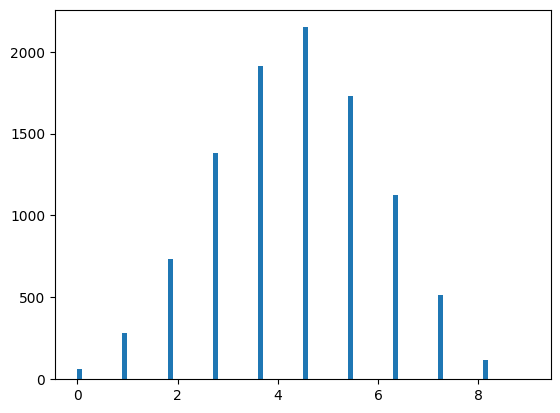

In [30]:
ppd = stats.binom.rvs(n=9, p=samples)
plt.hist(ppd, width=0.1);

**3M4** Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

In [34]:
sum(ppd == 6) / len(samples)

0.1729

**3M5** Start over at **3M1**, but now use a prior that is zero below $p = 0.5$ and a constant above $p = 0.5$. This corresponds to a prior information that a majority of the Earth's surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value $p = 0.7$.

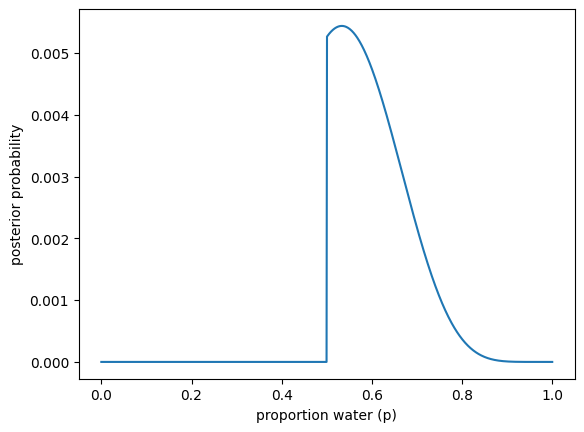

In [45]:
GRID_SIZE = 1000

p_grid = np.linspace(0, 1, GRID_SIZE)
prior = np.where(p_grid < 0.5, 0, 1)
likelihood = stats.binom.pmf(k=8, n=15, p=p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()

plt.plot(p_grid, posterior)
plt.xlabel('proportion water (p)')
plt.ylabel('posterior probability');

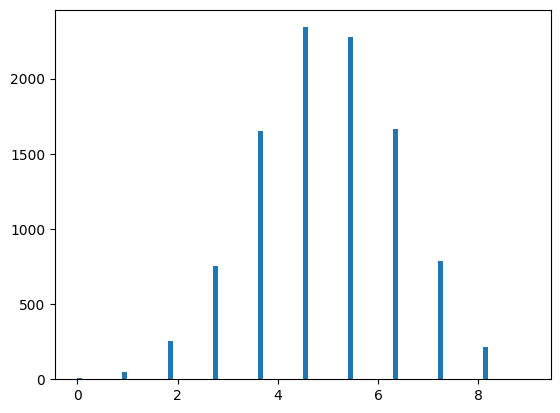

In [37]:
ppd = stats.binom.rvs(n=9, p=samples)
plt.hist(ppd, width=0.1);

In [38]:
sum(ppd == 6) / len(samples)

0.2279

The values are closer to the correct value and the inferences have less uncertainty.

**3M6** Suppose you want to estimate the Earth's proportion of water very precisely. Specifically, you want 99% percentile interval of the posterior distribution of $p$ to be only 0.05 wide. This means the distance between the upper and the lower bound of the interval should be 0.05. How many times will you have to toss the globe to do this?

In [65]:
TOSSES = np.arange(1500, 3000, 100)

ground_truth = 0.7
for tosses in TOSSES:
    results = stats.binom.rvs(n=tosses, p=ground_truth, size=100000)
    prob = results / tosses
    min_, max_ = az.hdi(prob, 0.99)
    diff = max_ - min_
    if diff < 0.05:
        break
print(f'For a probability of {ground_truth}, we only need {tosses} tosses to have an HPDI of 99% with less than 0.05.')

For a probability of 0.7, we only need 2300 tosses to have an HPDI of 99% with less than 0.05.


**HARD Problems**

In [67]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

In [69]:
boys_count = birth1.sum() + birth2.sum()
print(boys_count)

111


**3H1** Using grid approximation, compute the posterior distribution for the probability of a birth being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior probability?

0.5545545545545546


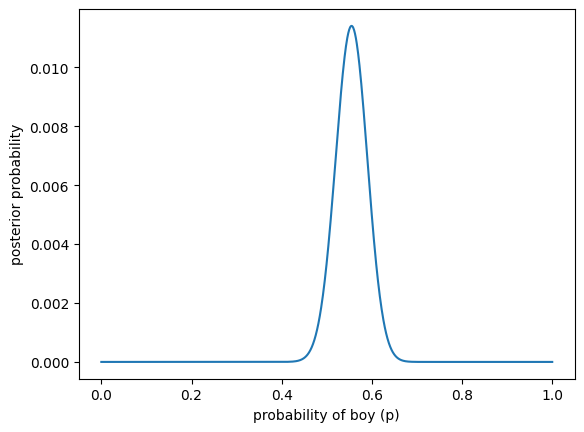

In [72]:
births_count = len(birth1) + len(birth2)

p_grid = np.linspace(0, 1, GRID_SIZE)
prior = np.repeat(1, 1000)
likelihood = stats.binom.pmf(k=boys_count, n=births_count, p=p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()

plt.plot(p_grid, posterior)
plt.xlabel('probability of boy (p)')
plt.ylabel('posterior probability');

print(p_grid[posterior.argmax()])

**3H2** Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89% and 97% highest posterior density intervals.

In [73]:
samples = np.random.choice(p_grid, p=posterior, size=10_000, replace=True)
print('50%: ', az.hdi(samples, 0.50))
print('89%: ', az.hdi(samples, 0.89))
print('97%: ', az.hdi(samples, 0.97))

50%:  [0.53053053 0.57657658]
89%:  [0.5005005  0.61261261]
97%:  [0.47747748 0.62662663]


**3H3** Use `rbinom` to simulate 10,000 replicates of 200 births. You should end up with 10,000 numbers, each one a count of boys out of 200 births. Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births). There are many good ways to visualize the simulations, but the `dens`command (part of the `rethinking` package) is probably the easiest way in this case. Does it look like the model fits the data well? That is, does the distribution of predictions include the actual observation as a central, likely outcome.

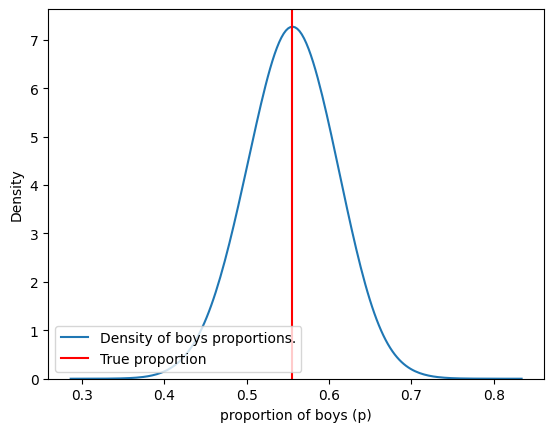

In [93]:
dummy_w = stats.binom.rvs(n=200, size=10_000, p=samples)
dummy_w = dummy_w / 200
sns.kdeplot(dummy_w, bw_method=0.5, label='Density of boys proportions.')
plt.xlabel('proportion of boys (p)')
plt.axvline([111/200], color='r', label='True proportion')
plt.ylabel('Density')
plt.legend(loc='lower left')

**3H4** Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys in the first births, `birth1`. How does the model look in this light?

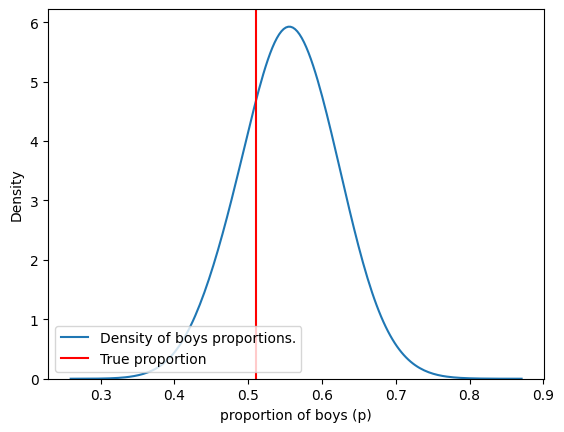

In [96]:
dummy_w = stats.binom.rvs(n=100, size=10_000, p=samples)
dummy_w = dummy_w / 100
sns.kdeplot(dummy_w, bw_method=0.5, label='Density of boys proportions.')
plt.xlabel('proportion of boys (p)')
plt.axvline([birth1.sum()/len(birth1)], color='r', label='True proportion')
plt.ylabel('Density')
plt.legend(loc='lower left')

The model still looks plausible for the first births.

**3H5** The model assumes that sex of first and second births are independent. To check this assumption, focus now on second births that followed female first borns. Compare 10,000 simulated counts of boys to only those second births that followed girls. To do this correctly, you need to count the number of first borns who were girls and simulate that many births 10,000 times. Compare the counts of boys in your simulations to the actual observed count of boys following girls. How does the model look in this light? Any guesses what is going on in these data?

Proportion of boys after first girl:  0.7959183673469388
Only 0.05% of posterior probability lies above the proportion that we get after first born is a girl.


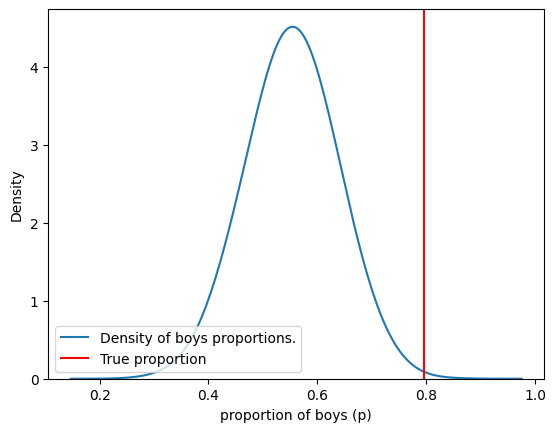

In [112]:
girls_count = sum(birth1 == 0)
births_after_girls = birth2[birth1 == 0]
boys_prop = births_after_girls.sum() / girls_count
print('Proportion of boys after first girl: ', boys_prop)

dummy_w = stats.binom.rvs(n=girls_count, size=10_000, p=samples)
dummy_w = dummy_w / girls_count
sns.kdeplot(dummy_w, bw_method=0.5, label='Density of boys proportions.')
plt.xlabel('proportion of boys (p)')
plt.axvline([boys_prop], color='r', label='True proportion')
plt.ylabel('Density')
plt.legend(loc='lower left');

interval = sum(dummy_w > boys_prop) / len(dummy_w)

print(f'Only {interval:.2%} of posterior probability lies above the proportion that we get after first born is a girl.')

Our model is in conflict with the assumption that the first and second births are independent.